In [348]:
# !pip install folium

In [1]:
import folium
import requests
import json
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
RAW_DIR = "./data/raw/"
OUTPUT_DIR = "./data/working/"
CAPTURE_DIR = "./data/captures/"

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(CAPTURE_DIR, exist_ok=True)

## 서울시 자치구 지도

In [8]:
# 서울 행정구역 json raw파일 (githubcontent)
r = requests.get("https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json")  
c = r.content
seoul_geo = json.loads(c)
# seoul_geo

In [10]:
# 위의 지도 테마 변경   

m = folium.Map(
    location=[37.5665, 126.9780],   
    zoom_start=11,
    tiles="cartodbpositron",
    min_zoom=10,
    max_zoom=11,
)
 
folium.GeoJson(seoul_geo, name="지역구").add_to(m)
m

## 자치구별 대여소 개수 집계 (2024년 6월 기준)

In [13]:
stations = pd.read_csv("./data/working/공공자전거_대여소_정보_CSV.csv")

In [15]:
stations.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [17]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2763 non-null   int64  
 1   보관소(대여소)명  2763 non-null   object 
 2   자치구        2763 non-null   object 
 3   상세주소       2763 non-null   object 
 4   위도         2763 non-null   float64
 5   경도         2763 non-null   float64
 6   설치시기       2763 non-null   object 
 7   LCD거치대수    1444 non-null   float64
 8   QR거치대수     1662 non-null   float64
 9   운영방식       2763 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 216.0+ KB


In [19]:
stations.shape

(2763, 10)

In [21]:
stations["자치구"].value_counts()

자치구
송파구     217
강서구     191
강남구     178
영등포구    159
노원구     151
서초구     147
마포구     119
강동구     117
구로구     115
양천구     112
종로구     102
은평구      98
중랑구      94
성동구      94
용산구      91
중구       90
광진구      83
성북구      82
동대문구     82
서대문구     81
관악구      76
도봉구      75
금천구      75
동작구      74
강북구      60
Name: count, dtype: int64

In [23]:
stations.isnull().sum()

대여소번호           0
보관소(대여소)명       0
자치구             0
상세주소            0
위도              0
경도              0
설치시기            0
LCD거치대수      1319
QR거치대수       1101
운영방식            0
dtype: int64

In [25]:
stations.nunique()

대여소번호        2763
보관소(대여소)명    2762
자치구            25
상세주소         2682
위도           2670
경도           2680
설치시기         1187
LCD거치대수        29
QR거치대수         41
운영방식            2
dtype: int64

In [27]:
stations["보관소(대여소)명"].unique()

array([' 경복궁역 7번출구 앞', ' 경복궁역 4번출구 뒤', ' 광화문역 1번출구 앞', ..., '서울도시건축전시관 옆',
       '덕수중학교', '서울자동차운전전문학원'], dtype=object)

In [29]:
# 중복된 보관소명 확인
duplicates = stations["보관소(대여소)명"][stations["보관소(대여소)명"].duplicated(keep=False)]
duplicates.value_counts()

보관소(대여소)명
한양수자인아파트 앞    2
Name: count, dtype: int64

In [31]:
dup_rows = stations[stations["보관소(대여소)명"].duplicated(keep=False)]
dup_rows

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
609,4811,한양수자인아파트 앞,중랑구,서울특별시 중랑구 면목동 1085-1,37.580322,127.094154,2021-02-17 00:00:00,NaN,10.0,QR
1721,1828,한양수자인아파트 앞,금천구,서울특별시 금천구 시흥대로150길 6,37.475319,126.898888,2017-05-08 16:04:16,10.0,NaN,LCD


In [33]:
stations_per_gu = (
    stations.groupby("자치구")["보관소(대여소)명"]
    .nunique()
    .reset_index(name="대여소_개수")
)

stations_per_gu

,자치구,대여소_개수
0,강남구,178
1,강동구,117
2,강북구,60
3,강서구,191
4,관악구,76
5,광진구,83
6,구로구,115
7,금천구,75
8,노원구,151
9,도봉구,75


In [35]:
total_stations = stations_per_gu["대여소_개수"].sum()
total_stations

2763

<Figure size 1200x600 with 0 Axes>

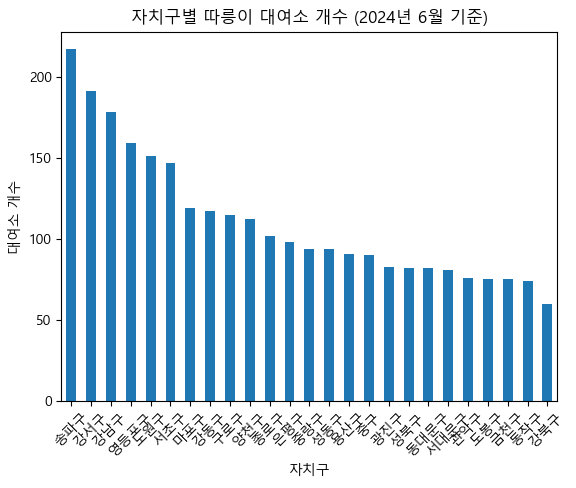

In [37]:
plt.figure(figsize=(12,6))

stations_per_gu.sort_values("대여소_개수", ascending=False).plot(
    x="자치구", y="대여소_개수", kind="bar", legend=False
)
plt.title("자치구별 따릉이 대여소 개수 (2024년 6월 기준)")
plt.ylabel("대여소 개수")
plt.xlabel("자치구")
plt.xticks(rotation=45)

plt.show()

In [38]:
# Choropleth 추가
folium.Choropleth(
    geo_data=seoul_geo,
    data=stations_per_gu,
    columns=["자치구", "대여소_개수"],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="자치구별 따릉이 대여소 수 (2024.06)"
).add_to(m)

bounds = folium.GeoJson(seoul_geo).get_bounds()
m.fit_bounds(bounds)

m

## 자치구별 6월 이용량 집계

In [42]:
usage = pd.read_csv("./data/working/tpss_bcycl_od_statnhm_202406_통합_w_자치구.csv")

In [43]:
usage.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
0,20240601,출발시간,0,ST-1002,목1동_004_1,양천구,ST-1017,목5동_059_1,양천구,1,8.0,870.0
1,20240601,출발시간,0,ST-1015,목5동_001_1,양천구,ST-997,목4동_021_1,양천구,1,10.0,1552.0
2,20240601,출발시간,0,ST-1036,역촌동_001_1,은평구,ST-1035,불광2동_021_1,은평구,1,42.0,4980.0
3,20240601,출발시간,0,ST-1045,성내2동_007_1,강동구,ST-1580,오륜동_001_3,송파구,1,8.0,1923.0
4,20240601,출발시간,0,ST-1047,성내1동_023_1,강동구,ST-488,암사1동_044_1,강동구,1,18.0,3530.0


In [44]:
usage.shape

(8831528, 12)

In [45]:
usage["기준_시간대"].unique()

array([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,   50,
         55,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  200,  205,  210,  215,  220,  225,  230,  235,  240,
        245,  250,  255,  300,  305,  310,  315,  320,  325,  330,  335,
        340,  345,  350,  355,  400,  405,  410,  415,  420,  425,  430,
        435,  440,  445,  450,  455,  500,  505,  510,  515,  520,  525,
        530,  535,  540,  545,  550,  555,  600,  605,  610,  615,  620,
        625,  630,  635,  640,  645,  650,  655,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  755,  800,  805,  810,
        815,  820,  825,  830,  835,  840,  845,  850,  855,  900,  905,
        910,  915,  920,  925,  930,  935,  940,  945,  950,  955, 1000,
       1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055,
       1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150,
       1155, 1200, 1205, 1210, 1215, 1220, 1225, 12

In [46]:
usage["기준_시간대"].nunique()

288

In [47]:
usage[usage["기준_시간대"] == 745]

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
30802,20240601,출발시간,745,ST-1003,신월5동_001_1,양천구,ST-2480,우장산동_062_1,강서구,1,9.0,1760.0
30803,20240601,출발시간,745,ST-1015,목5동_001_1,양천구,ST-1350,목5동_026_1,양천구,1,5.0,817.0
30804,20240601,출발시간,745,ST-1035,불광2동_021_1,은평구,ST-2824,갈현1동_032_1,은평구,1,6.0,661.0
30805,20240601,출발시간,745,ST-1042,상일동_025_1,강동구,ST-1061,천호1동_039_1,강동구,1,25.0,2715.0
30806,20240601,출발시간,745,ST-1061,천호1동_039_1,강동구,ST-892,방이1동_017_1,송파구,1,24.0,4380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8668529,20240630,도착시간,745,ST-73,여의동_009_1,영등포구,ST-70,여의동_016_1,영등포구,1,4.0,1050.0
8668530,20240630,도착시간,745,ST-788,논현1동_004_1,강남구,ST-787,논현1동_043_1,강남구,1,4.0,670.0
8668531,20240630,도착시간,745,ST-796,청담동_003_1,강남구,ST-777,신사동_001_1,강남구,1,17.0,2850.0
8668532,20240630,도착시간,745,ST-918,구로4동_006_2,구로구,ST-59,여의동_036_3,영등포구,1,24.0,4315.0


In [48]:
usage.dtypes

기준_날짜           int64
집계_기준          object
기준_시간대          int64
시작_대여소_ID      object
시작_대여소명        object
시작_대여소_자치구     object
종료_대여소_ID      object
종료_대여소명        object
종료_대여소_자치구     object
전체_건수           int64
전체_이용_분       float64
전체_이용_거리      float64
dtype: object

In [49]:
usage.isnull().sum()

기준_날짜              0
집계_기준              0
기준_시간대             0
시작_대여소_ID          0
시작_대여소명            0
시작_대여소_자치구       552
종료_대여소_ID          0
종료_대여소명        30932
종료_대여소_자치구     31304
전체_건수              0
전체_이용_분       193545
전체_이용_거리      193545
dtype: int64

In [50]:
missing_end_gu = usage[usage["종료_대여소_자치구"].isnull()]
missing_end_gu.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
132,20240601,출발시간,0,ST-2308,화양동_041_2,광진구,X,NaN,NaN,1,114.0,605.0
805,20240601,출발시간,10,ST-1236,신도림동_062_1,구로구,X,NaN,NaN,1,60.0,3026.0
832,20240601,출발시간,10,ST-1353,영등포본동_044_1,영등포구,X,NaN,NaN,1,20.0,1976.0
943,20240601,출발시간,10,ST-2502,용신동_003_1,동대문구,X,NaN,NaN,1,60.0,7054.0
1103,20240601,출발시간,10,ST-910,월곡2동_015_1,성북구,X,NaN,NaN,1,4.0,533.0


In [51]:
missing_end_gu["기준_시간대"]

132           0
805          10
832          10
943          10
1103         10
           ... 
8829566    2335
8829708    2335
8830169    2340
8831075    2350
8831324    2355
Name: 기준_시간대, Length: 31304, dtype: int64

In [52]:
missing_end_gu["기준_시간대"].unique()

array([   0,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,
        100,  105,  110,  115,  125,  130,  145,  150,  155,  205,  210,
        215,  220,  225,  230,  240,  245,  250,  305,  310,  320,  330,
        335,  345,  405,  415,  435,  450,  505,  525,  535,  600,  605,
        610,  620,  625,  635,  640,  650,  720,  740,  745,  750,  755,
        805,  810,  815,  820,  825,  830,  835,  840,  845,  850,  855,
        900,  905,  915,  920,  925,  930,  935,  940,  945,  950,  955,
       1000, 1005, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055,
       1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150,
       1155, 1200, 1205, 1210, 1215, 1220, 1225, 1230, 1235, 1240, 1245,
       1250, 1255, 1300, 1305, 1310, 1315, 1320, 1325, 1330, 1335, 1340,
       1345, 1350, 1355, 1400, 1405, 1410, 1415, 1420, 1425, 1430, 1435,
       1440, 1445, 1450, 1455, 1500, 1505, 1510, 1515, 1520, 1525, 1530,
       1535, 1540, 1545, 1550, 1555, 1600, 1605, 16

In [53]:
missing_end_gu["기준_시간대"].value_counts()

기준_시간대
1805    335
1900    320
1905    311
1810    308
1800    289
       ... 
415       8
250       7
500       7
450       6
445       4
Name: count, Length: 288, dtype: int64

In [54]:
missing_minutes = usage[usage["전체_이용_분"].isnull()]
missing_minutes.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
19,20240601,출발시간,0,ST-1174,압구정동_044_1,강남구,ST-794,청담동_014_1,강남구,1,NaN,NaN
66,20240601,출발시간,0,ST-1590,잠실3동_070_3,송파구,ST-1590,잠실3동_070_3,송파구,1,NaN,NaN
78,20240601,출발시간,0,ST-1718,방화1동_064_1,강서구,ST-1718,방화1동_064_1,강서구,1,NaN,NaN
172,20240601,출발시간,0,ST-271,용신동_054_1,동대문구,ST-177,숭인2동_005_2,종로구,1,NaN,NaN
184,20240601,출발시간,0,ST-2762,신정4동_052_1,양천구,ST-1008,신월2동_026_1,양천구,1,NaN,NaN


In [55]:
missing_minutes["기준_시간대"].value_counts()

기준_시간대
1805    1795
1810    1695
1815    1659
1800    1553
1820    1470
        ... 
430       83
410       82
445       79
435       77
415       70
Name: count, Length: 288, dtype: int64

In [56]:
missing_distance = usage[usage["전체_이용_거리"].isnull()]
missing_distance.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
19,20240601,출발시간,0,ST-1174,압구정동_044_1,강남구,ST-794,청담동_014_1,강남구,1,NaN,NaN
66,20240601,출발시간,0,ST-1590,잠실3동_070_3,송파구,ST-1590,잠실3동_070_3,송파구,1,NaN,NaN
78,20240601,출발시간,0,ST-1718,방화1동_064_1,강서구,ST-1718,방화1동_064_1,강서구,1,NaN,NaN
172,20240601,출발시간,0,ST-271,용신동_054_1,동대문구,ST-177,숭인2동_005_2,종로구,1,NaN,NaN
184,20240601,출발시간,0,ST-2762,신정4동_052_1,양천구,ST-1008,신월2동_026_1,양천구,1,NaN,NaN


In [72]:
missing_distance["기준_시간대"].value_counts()

기준_시간대
1805    1795
1810    1695
1815    1659
1800    1553
1820    1470
        ... 
430       83
410       82
445       79
435       77
415       70
Name: count, Length: 288, dtype: int64

In [74]:
seven_oclock_data = usage[(usage["기준_시간대"] >= 700) & (usage["기준_시간대"] < 800)]
seven_oclock_data.isnull().sum()

기준_날짜             0
집계_기준             0
기준_시간대            0
시작_대여소_ID         0
시작_대여소명           0
시작_대여소_자치구        4
종료_대여소_ID         0
종료_대여소명        1193
종료_대여소_자치구     1259
전체_건수             0
전체_이용_분       10603
전체_이용_거리      10603
dtype: int64

## 데이터 전처리

- 1시간 단위 `"기준_시간"` 컬럼 추가

In [78]:
usage_cleaned = usage.copy()
usage_cleaned["기준_시간"] = usage_cleaned["기준_시간대"] // 100

In [79]:
usage_cleaned.shape

(8831528, 13)

In [82]:
usage_cleaned["기준_시간"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [84]:
usage_cleaned["기준_시간"].nunique()

24

- "활성", "중간", "비활성" `"시간_구분"` 컬럼 추가

In [87]:
# 활성, 중간, 비활성 리스트
active_hours = [8, 16, 17, 18, 19, 20]
mid_hours = [0, 6, 7, 9, 10, 11, 12, 13, 14, 15, 21, 22]
inactive_hours = [1, 2, 3, 4, 5, 23]

# "시간_구분" 생성 함수
def get_time_category(hour):
    if hour in active_hours:
        return "활성"
    elif hour in mid_hours:
        return "중간"
    elif hour in inactive_hours:
        return "비활성"
    else:
        return "기타"

# "시간_구분" 컬럼 추가 
usage_cleaned["시간_구분"] = usage_cleaned["기준_시간"].apply(get_time_category)

In [88]:
usage_cleaned.shape

(8831528, 14)

In [89]:
usage_cleaned.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리,기준_시간,시간_구분
0,20240601,출발시간,0,ST-1002,목1동_004_1,양천구,ST-1017,목5동_059_1,양천구,1,8.0,870.0,0,중간
1,20240601,출발시간,0,ST-1015,목5동_001_1,양천구,ST-997,목4동_021_1,양천구,1,10.0,1552.0,0,중간
2,20240601,출발시간,0,ST-1036,역촌동_001_1,은평구,ST-1035,불광2동_021_1,은평구,1,42.0,4980.0,0,중간
3,20240601,출발시간,0,ST-1045,성내2동_007_1,강동구,ST-1580,오륜동_001_3,송파구,1,8.0,1923.0,0,중간
4,20240601,출발시간,0,ST-1047,성내1동_023_1,강동구,ST-488,암사1동_044_1,강동구,1,18.0,3530.0,0,중간


In [90]:
usage_cleaned["기준_시간"].nunique()

24

- `"집계_기준"에 따라` 필요한 결측치만 제거 후 대여량과 반납량 분리 및 집계
- 대여 데이터는 `"시작_대여소_자치구" 결측치`만 제거
- 반납 데이터는 `"종료_대여소_자치구" 결측치`만 제거

In [95]:
rental_data = usage_cleaned[usage_cleaned["집계_기준"] == "출발시간"].dropna(subset=["시작_대여소_자치구"]).copy()
return_data = usage_cleaned[usage_cleaned["집계_기준"] == "도착시간"].dropna(subset=["종료_대여소_자치구"]).copy()

In [97]:
print("대여 데이터 행 수:", len(rental_data))
print("반납 데이터 행 수:", len(return_data))

대여 데이터 행 수: 4427731
반납 데이터 행 수: 4387837


- 자치구별, 시간대별 `대여, 반납, 대여+반납` 각각 집계

In [99]:
rental_counts = rental_data.groupby(["시작_대여소_자치구", "시간_구분"]).size().reset_index(name="대여_건수")
return_counts = return_data.groupby(["종료_대여소_자치구", "시간_구분"]).size().reset_index(name="반납_건수")

In [100]:
rental_counts

,시작_대여소_자치구,시간_구분,대여_건수
0,강남구,비활성,10549
1,강남구,중간,70129
2,강남구,활성,73554
3,강동구,비활성,14935
4,강동구,중간,99254
...,...,...,...
70,중구,중간,45267
71,중구,활성,45405
72,중랑구,비활성,11908
73,중랑구,중간,61558


In [101]:
return_counts

,종료_대여소_자치구,시간_구분,반납_건수
0,강남구,비활성,12415
1,강남구,중간,68393
2,강남구,활성,65499
3,강동구,비활성,18067
4,강동구,중간,95610
...,...,...,...
70,중구,중간,45320
71,중구,활성,39836
72,중랑구,비활성,14654
73,중랑구,중간,58707


In [107]:
# 자치구 컬럼 이름 통일
rental_counts.rename(columns={"시작_대여소_자치구": "자치구"}, inplace=True)
return_counts.rename(columns={"종료_대여소_자치구": "자치구"}, inplace=True)

# 모든 자치구 포함
merged_df = pd.merge(rental_counts, return_counts, on=["자치구", "시간_구분"], how="outer").fillna(0)
merged_df["대여_반납_합계"] = merged_df["대여_건수"] + merged_df["반납_건수"]
merged_df

,자치구,시간_구분,대여_건수,반납_건수,대여_반납_합계
0,강남구,비활성,10549,12415,22964
1,강남구,중간,70129,68393,138522
2,강남구,활성,73554,65499,139053
3,강동구,비활성,14935,18067,33002
4,강동구,중간,99254,95610,194864
...,...,...,...,...,...
70,중구,중간,45267,45320,90587
71,중구,활성,45405,39836,85241
72,중랑구,비활성,11908,14654,26562
73,중랑구,중간,61558,58707,120265


In [109]:
# 원하면 대여+반납량만 포함된 새로운 데이터프레임 생성
total_counts = merged_df[["자치구", "시간_구분", "대여_반납_합계"]]
total_counts

,자치구,시간_구분,대여_반납_합계
0,강남구,비활성,22964
1,강남구,중간,138522
2,강남구,활성,139053
3,강동구,비활성,33002
4,강동구,중간,194864
...,...,...,...
70,중구,중간,90587
71,중구,활성,85241
72,중랑구,비활성,26562
73,중랑구,중간,120265


## 회전율 = (자치구 별 대여 + 반납 수) / 대여소 개수

In [112]:
stations_per_gu.shape

(25, 2)

In [114]:
stations_per_gu

,자치구,대여소_개수
0,강남구,178
1,강동구,117
2,강북구,60
3,강서구,191
4,관악구,76
5,광진구,83
6,구로구,115
7,금천구,75
8,노원구,151
9,도봉구,75


In [116]:
rotation_rate_df = pd.merge(merged_df, stations_per_gu, on="자치구", how="left")

In [118]:
rotation_rate_df

,자치구,시간_구분,대여_건수,반납_건수,대여_반납_합계,대여소_개수
0,강남구,비활성,10549,12415,22964,178
1,강남구,중간,70129,68393,138522,178
2,강남구,활성,73554,65499,139053,178
3,강동구,비활성,14935,18067,33002,117
4,강동구,중간,99254,95610,194864,117
...,...,...,...,...,...,...
70,중구,중간,45267,45320,90587,90
71,중구,활성,45405,39836,85241,90
72,중랑구,비활성,11908,14654,26562,94
73,중랑구,중간,61558,58707,120265,94


In [120]:
rotation_rate_df["회전율"] = rotation_rate_df["대여_반납_합계"] / rotation_rate_df["대여소_개수"]
rotation_rate_df

,자치구,시간_구분,대여_건수,반납_건수,대여_반납_합계,대여소_개수,회전율
0,강남구,비활성,10549,12415,22964,178,129.011236
1,강남구,중간,70129,68393,138522,178,778.213483
2,강남구,활성,73554,65499,139053,178,781.196629
3,강동구,비활성,14935,18067,33002,117,282.068376
4,강동구,중간,99254,95610,194864,117,1665.504274
...,...,...,...,...,...,...,...
70,중구,중간,45267,45320,90587,90,1006.522222
71,중구,활성,45405,39836,85241,90,947.122222
72,중랑구,비활성,11908,14654,26562,94,282.574468
73,중랑구,중간,61558,58707,120265,94,1279.414894


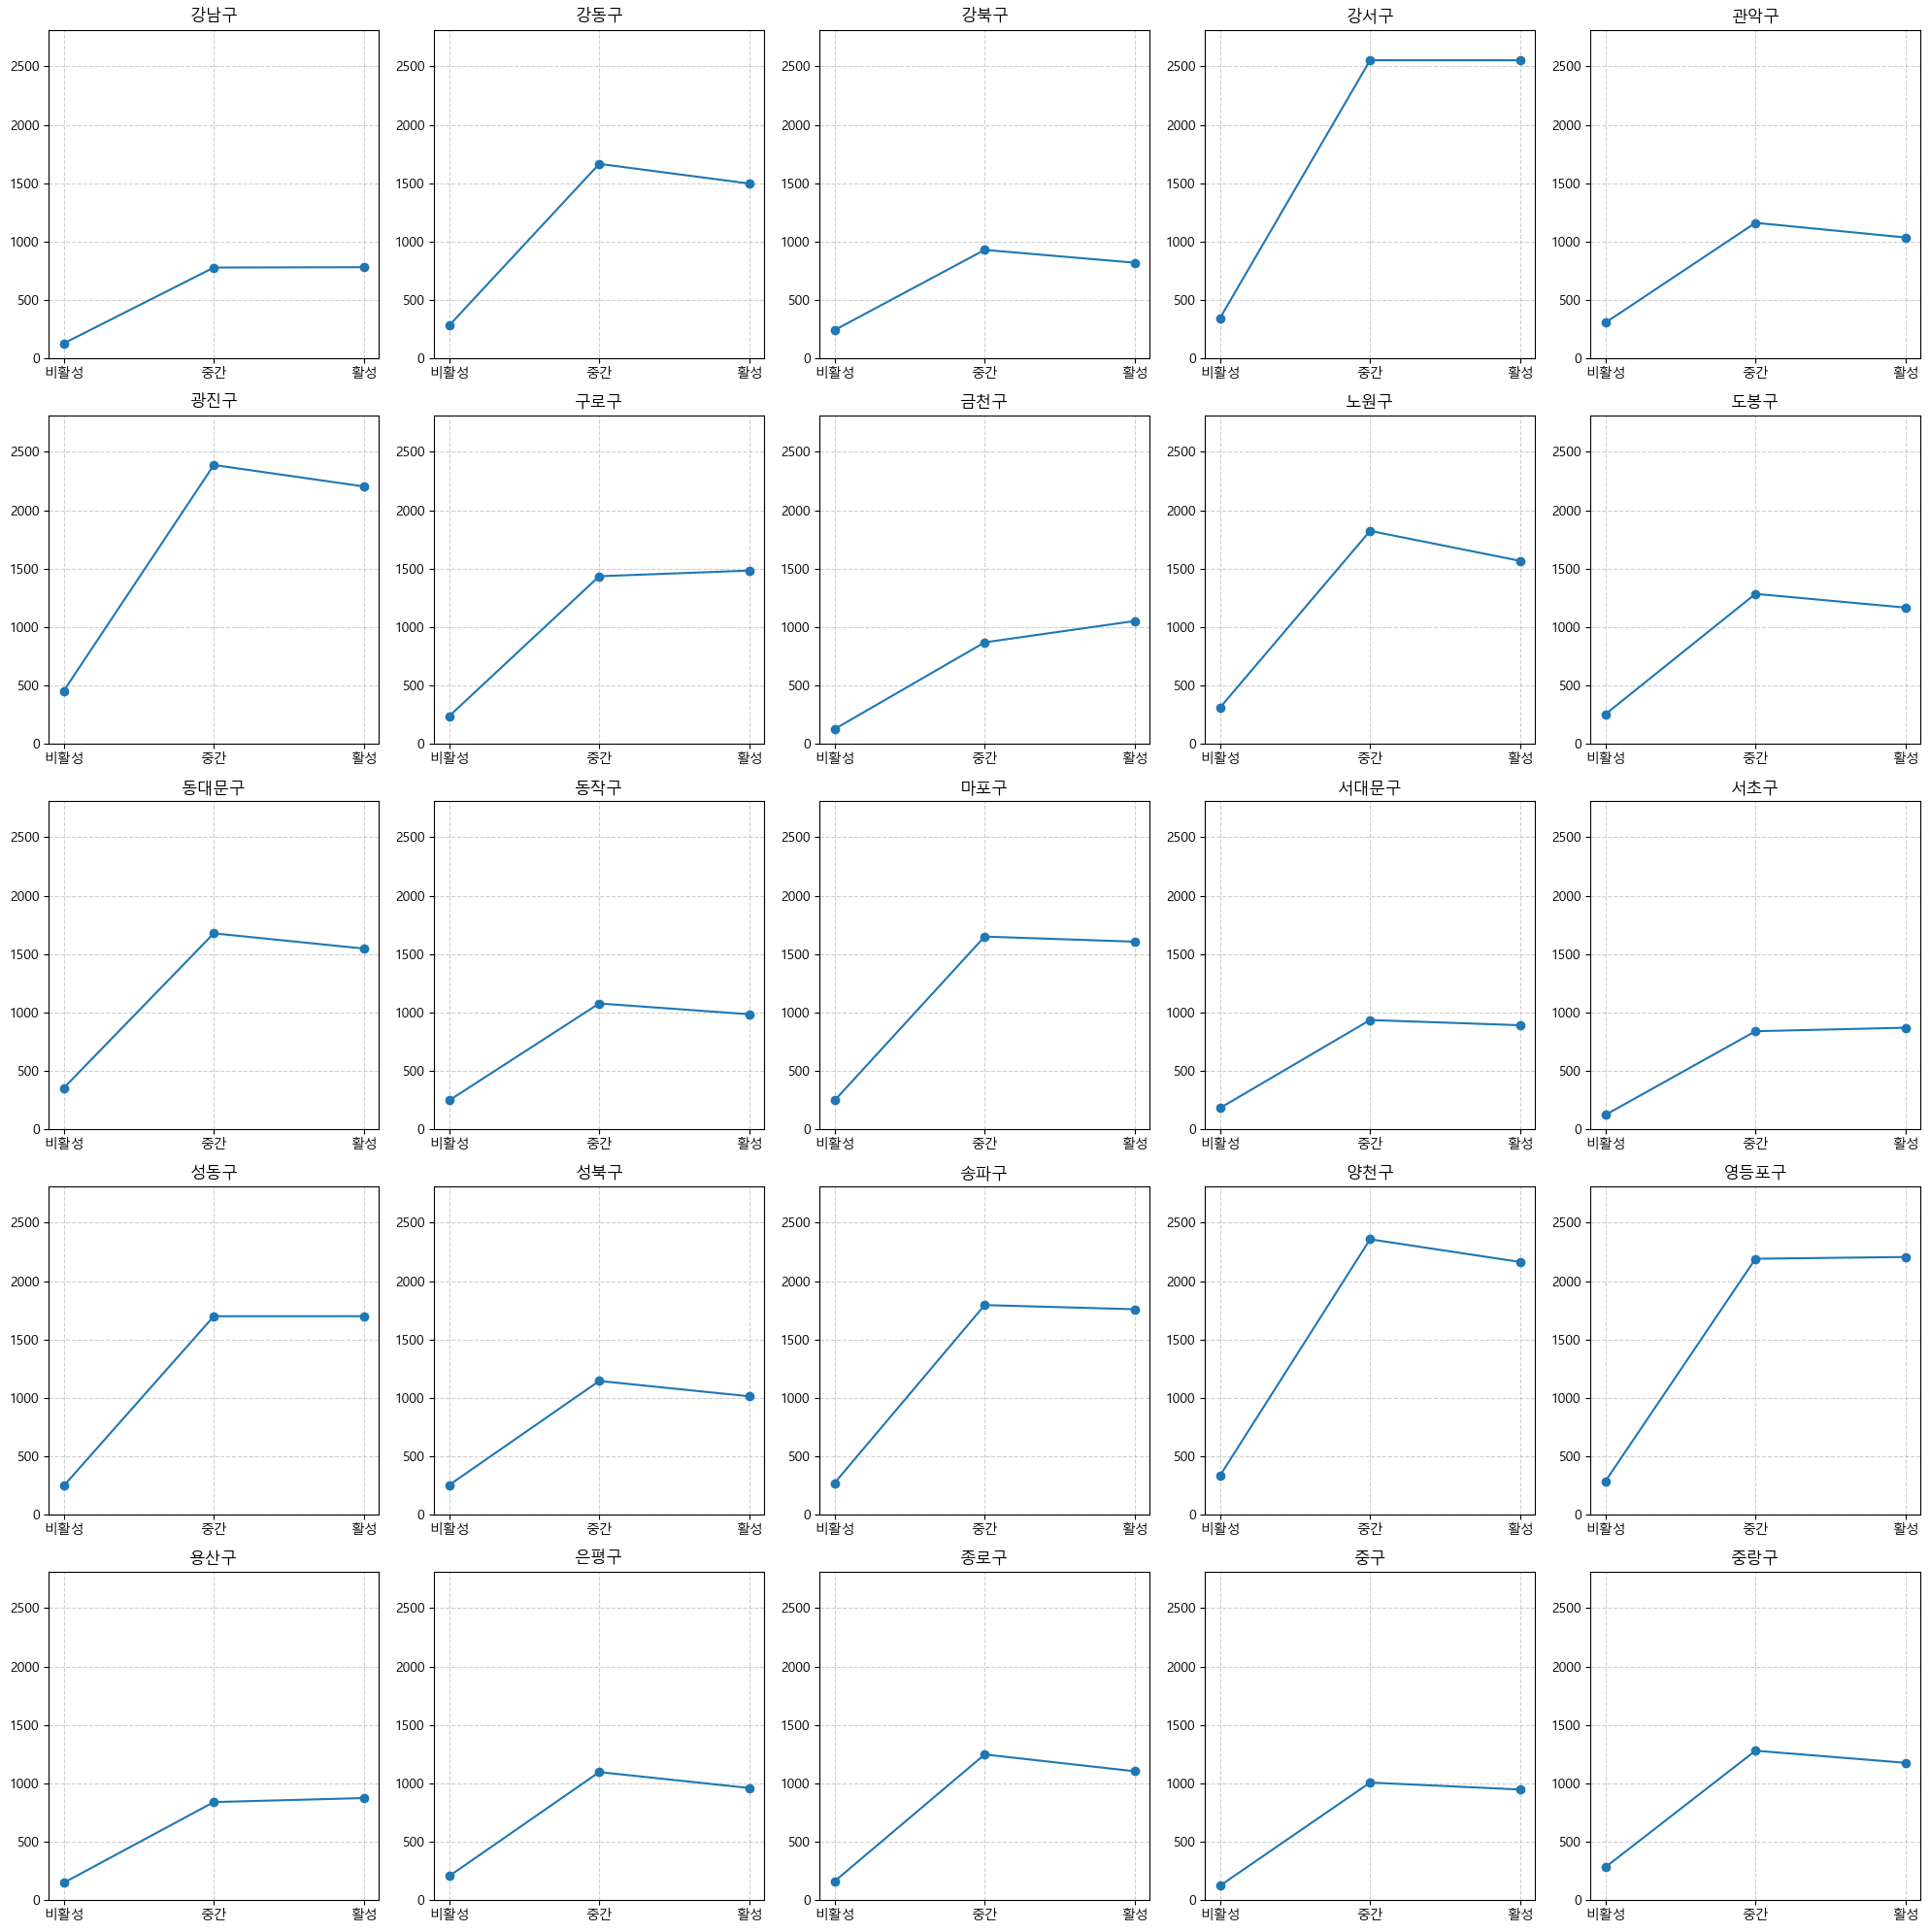

In [122]:
gu_list = rotation_rate_df["자치구"].unique()

fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, gu in enumerate(gu_list):
    ax = axes[i]
    subset = rotation_rate_df[rotation_rate_df["자치구"] == gu]
    ax.plot(subset["시간_구분"], subset["회전율"], marker="o")
    ax.set_title(f"{gu}", fontsize=12)
    ax.set_ylim(0, rotation_rate_df["회전율"].max() * 1.1)
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

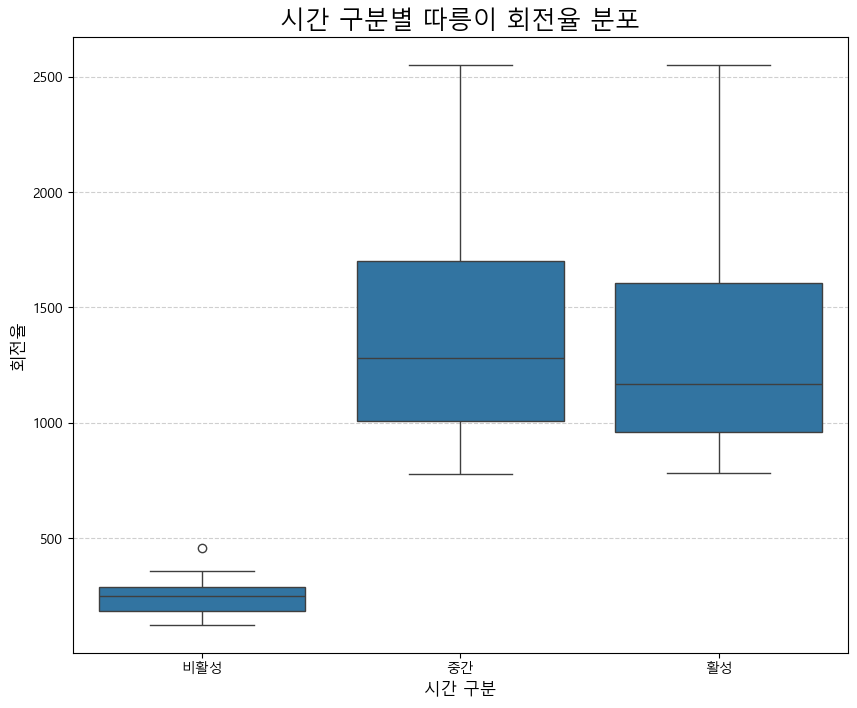

In [123]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="시간_구분", y="회전율", data=rotation_rate_df, order=["비활성", "중간", "활성"])
plt.title("시간 구분별 따릉이 회전율 분포", fontsize=18)
plt.xlabel("시간 구분", fontsize=12)
plt.ylabel("회전율", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [124]:
time_categories = ["비활성", "중간", "활성"]

for category in time_categories:
    map_data = rotation_rate_df[rotation_rate_df["시간_구분"] == category][["자치구", "회전율"]]

    # 지도 생성
    m = folium.Map(
        location=[37.5665, 126.9780],
        zoom_start=11,
        tiles="cartodbpositron",
        min_zoom=10,
        max_zoom=11,
    )

    # Choropleth 시각화
    folium.Choropleth(
        geo_data=seoul_geo,
        data=map_data,
        columns=["자치구", "회전율"],
        key_on="properties.name",
        fill_color="YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.5,
        legend_name=f"자치구별 따릉이 회전율 ({category} 시간대)",
        highlight=True
    ).add_to(m)
    
    # 툴팁에 회전율 추가
    for feature in seoul_geo["features"]:
        gu_name = feature["properties"]["name"]
        rate = map_data[map_data["자치구"] == gu_name]["회전율"].iloc[0] if not map_data[map_data["자치구"] == gu_name].empty else "N/A"
        
        folium.features.GeoJson(
            feature,
            tooltip=folium.Tooltip(f"{gu_name}: {rate:.2f}"),
            style_function=lambda x: {"fillColor": "#ffffff", "color":"#000000", "fillOpacity":0.1, "weight":0.1},
            highlight_function=lambda x: {"fillColor": "#000000", "color":"#000000", "fillOpacity":0.50, "weight":0.1}
        ).add_to(m)
    
    # 지도 출력
    print(f"{category}")
    display(m)

비활성


중간


활성


### 회전율 컬럼 추출

In [129]:
rotation_rate_df.shape

(75, 7)

In [131]:
rotation_rate_df.isnull().sum()

자치구         0
시간_구분       0
대여_건수       0
반납_건수       0
대여_반납_합계    0
대여소_개수      0
회전율         0
dtype: int64

In [133]:
rotation_rate_for_kmeans = rotation_rate_df.pivot_table(
    index="자치구",
    columns="시간_구분",
    values="회전율"
).reset_index()

rotation_rate_for_kmeans.head()

시간_구분,자치구,비활성,중간,활성
0,강남구,129.011236,778.213483,781.196629
1,강동구,282.068376,1665.504274,1497.119658
2,강북구,242.500000,929.383333,819.366667
3,강서구,344.910995,2552.759162,2552.308901
4,관악구,306.263158,1160.986842,1035.328947


In [135]:
rotation_rate_for_kmeans.shape

(25, 4)

## 시간대 별(00~23시) 이용률 (최대) - (최소) 편차

In [138]:
print("대여 데이터 행 수:", rental_data.shape)
print("반납 데이터 행 수:", return_data.shape)

대여 데이터 행 수: (4427731, 14)
반납 데이터 행 수: (4387837, 14)


In [146]:
# 컬럼명 통합
rental_data.rename(columns={"시작_대여소_자치구": "자치구"}, inplace=True)
return_data.rename(columns={"종료_대여소_자치구": "자치구"}, inplace=True)

total_usage_by_gu_time = pd.concat([rental_data, return_data])
usage_by_hour = total_usage_by_gu_time.groupby(["자치구", "기준_시간"]).size().reset_index(name="총_이용량")

# 각 자치구별 혼잡/한산 시간대 정보와 최대/최소 이용량 추출
max_min_usage_with_hours = usage_by_hour.groupby("자치구", as_index=False, group_keys=False).apply(
    lambda x: pd.Series({
        "혼잡_시간대": x.loc[x["총_이용량"].idxmax()]["기준_시간"],
        "최대_이용량": x["총_이용량"].max(),
        "한산_시간대": x.loc[x["총_이용량"].idxmin()]["기준_시간"],
        "최소_이용량": x["총_이용량"].min()
    })
)

# 최대-최소 편차 컬럼 생성
max_min_usage_with_hours["이용량_편차"] = max_min_usage_with_hours["최대_이용량"] - max_min_usage_with_hours["최소_이용량"]

C:\Users\user\AppData\Local\Temp\ipykernel_11256\958540290.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_min_usage_with_hours = usage_by_hour.groupby("자치구", as_index=False, group_keys=False).apply(


In [148]:
max_min_usage_with_hours.head()

,자치구,혼잡_시간대,최대_이용량,한산_시간대,최소_이용량,이용량_편차
0,강남구,18,33273,4,1904,31369
1,강동구,18,38300,4,2297,36003
2,강북구,18,10245,4,1439,8806
3,강서구,18,109306,4,4653,104653
4,관악구,18,17159,4,1978,15181


In [150]:
max_min_usage_with_hours["혼잡_시간대"].unique()

array([18], dtype=int64)

In [152]:
max_min_usage_with_hours["한산_시간대"].unique()

array([4, 3], dtype=int64)

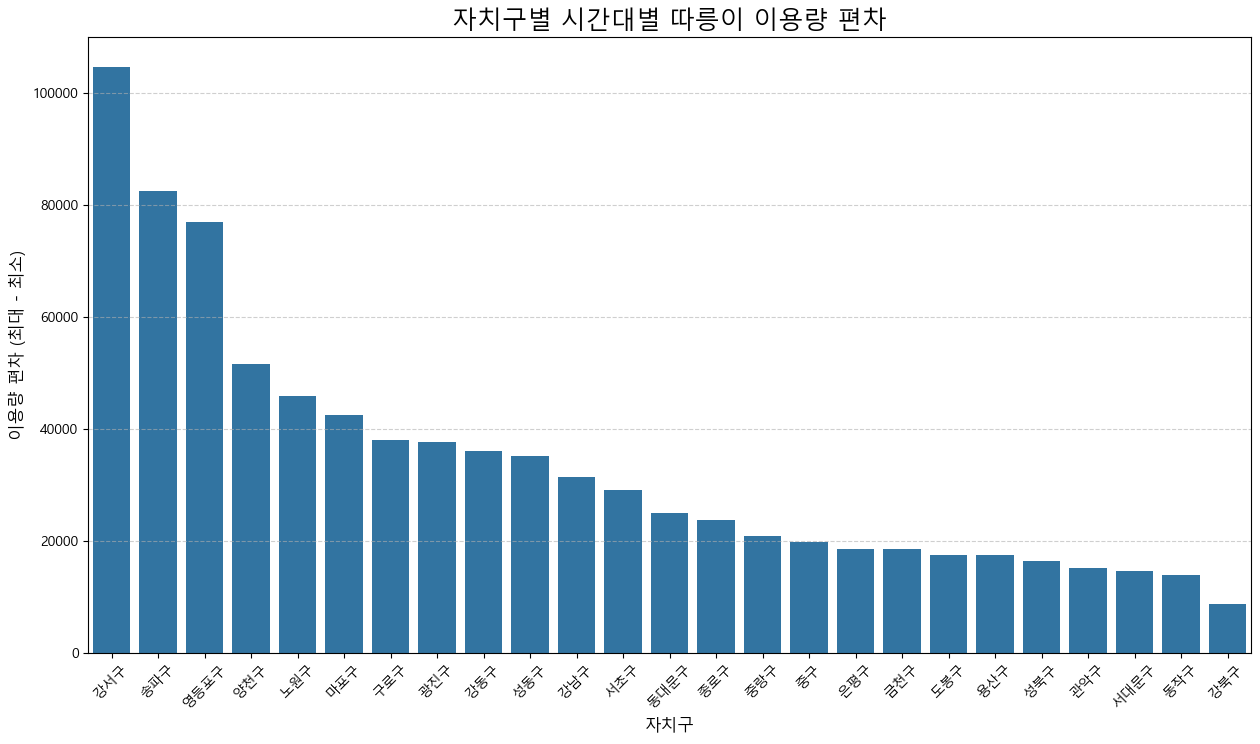

In [154]:
plt.figure(figsize=(15, 8))

sns.barplot(
    x="자치구",
    y="이용량_편차",
    data=max_min_usage_with_hours.sort_values(by="이용량_편차", ascending=False)
)

plt.title("자치구별 시간대별 따릉이 이용량 편차", fontsize=18)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("이용량 편차 (최대 - 최소)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [156]:
map_data = max_min_usage_with_hours[['자치구', '이용량_편차']]

# 지도 생성
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

# Choropleth 시각화
folium.Choropleth(
    geo_data=seoul_geo,
    data=map_data,
    columns=['자치구', '이용량_편차'],
    key_on="properties.name",
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='자치구별 따릉이 이용량 편차',
    highlight=True
).add_to(m)

# 툴팁에 편차 추가
for feature in seoul_geo['features']:
    gu_name = feature['properties']['name']
    rate = map_data[map_data['자치구'] == gu_name]['이용량_편차'].iloc[0] if not map_data[map_data['자치구'] == gu_name].empty else 'N/A'
    
    folium.features.GeoJson(
        feature,
        tooltip=folium.Tooltip(f'{gu_name}: {rate:.0f}'),
        style_function=lambda x: {'fillColor': '#ffffff', 'color':'#000000', 'fillOpacity':0.1, 'weight':0.1},
        highlight_function=lambda x: {'fillColor': '#000000', 'color':'#000000', 'fillOpacity':0.50, 'weight':0.1}
    ).add_to(m)

m

### 이용률 컬럼 추출

In [159]:
max_min_usage_with_hours.head()

,자치구,혼잡_시간대,최대_이용량,한산_시간대,최소_이용량,이용량_편차
0,강남구,18,33273,4,1904,31369
1,강동구,18,38300,4,2297,36003
2,강북구,18,10245,4,1439,8806
3,강서구,18,109306,4,4653,104653
4,관악구,18,17159,4,1978,15181
